In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import sys
import os

# Add your script folder to Python path
script_path = "../scripts/data_cleaning.py"  # Update this path
sys.path.append(script_path)

# Verify
print(sys.path) 

['C:\\Program Files\\Python313\\python313.zip', 'C:\\Program Files\\Python313\\DLLs', 'C:\\Program Files\\Python313\\Lib', 'C:\\Program Files\\Python313', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 10\\AIM_WEEK_10\\BIRHAN', '', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 10\\AIM_WEEK_10\\BIRHAN\\Lib\\site-packages', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 10\\AIM_WEEK_10\\BIRHAN\\Lib\\site-packages\\win32', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 10\\AIM_WEEK_10\\BIRHAN\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\HP\\Desktop\\10 Acadamy\\AIM Week 10\\AIM_WEEK_10\\BIRHAN\\Lib\\site-packages\\Pythonwin', '../scripts/data_cleaning.py']


In [3]:
df=pd.read_csv("../data/BrentOilPrices.csv")

In [4]:
print(df.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


Task 1: Data Analysis Workflow and Understanding the Model and Data 
1.1 Data Preprocessing and Exploratory Data Analysis (EDA)

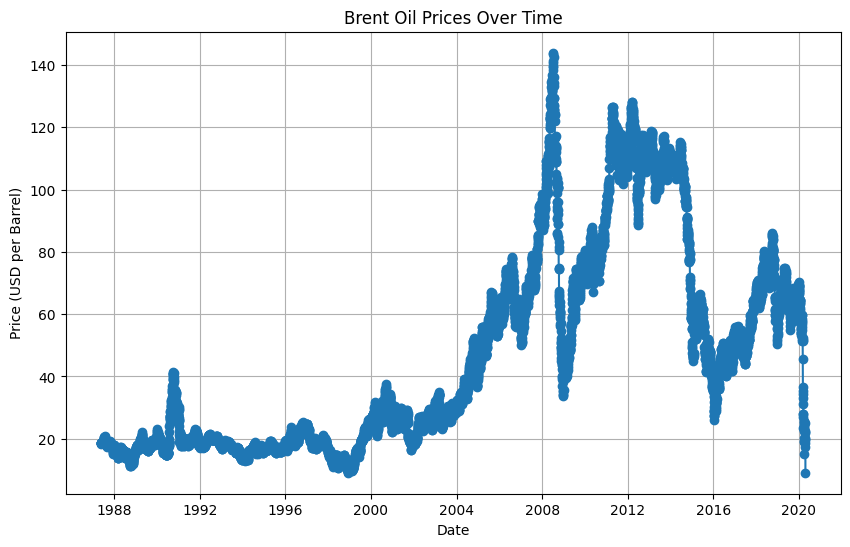

             Price
count  8360.000000
mean     46.459669
std      32.504671
min       9.100000
25%      18.780000
50%      31.750000
75%      67.042500
max     143.950000


In [5]:

# Convert 'Date' to datetime format
# Handling potential inconsistencies in the 'Date' column
# using the `dayfirst` argument to ensure correct day and month parsing
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce', dayfirst=False)

# errors='coerce' converts invalid dates to NaT (Not a Time)
# Drop rows with NaT in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], marker='o', linestyle='-')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.grid(True)
plt.show()

# Summary statistics
print(df.describe())

1.2 Change Point Analysis

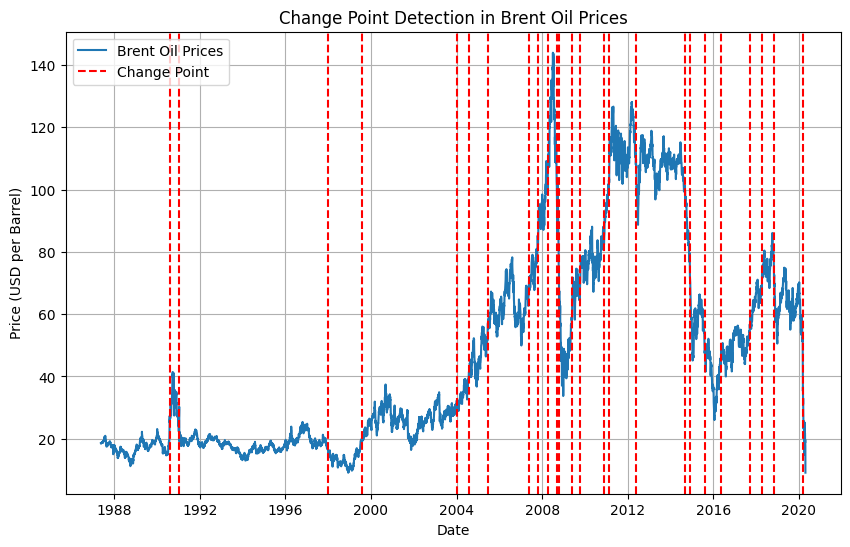

In [6]:

import ruptures as rpt

# Convert prices to a numpy array
prices = df['Price'].values

# Perform change point detection
algo = rpt.Pelt(model="rbf").fit(prices)
change_points = algo.predict(pen=10)  # Penalty parameter to control sensitivity

# Plot change points
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Brent Oil Prices')
for cp in change_points[:-1]:  # Exclude the last point (end of the series)
    plt.axvline(x=df.index[cp], color='r', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.title('Change Point Detection in Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.grid(True)
plt.show()

Task 2: Statistical Modeling and Advanced Analysis

2.1 ARIMA Model for Time Series Forecasting

c:\Users\HP\Desktop\10 Acadamy\AIM Week 10\AIM_WEEK_10\BIRHAN\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\10 Acadamy\AIM Week 10\AIM_WEEK_10\BIRHAN\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\10 Acadamy\AIM Week 10\AIM_WEEK_10\BIRHAN\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\10 Acadamy\AIM Week 10\AIM_WEEK_10\BIRHAN\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarnin

Mean Squared Error: 2303.9727976201434


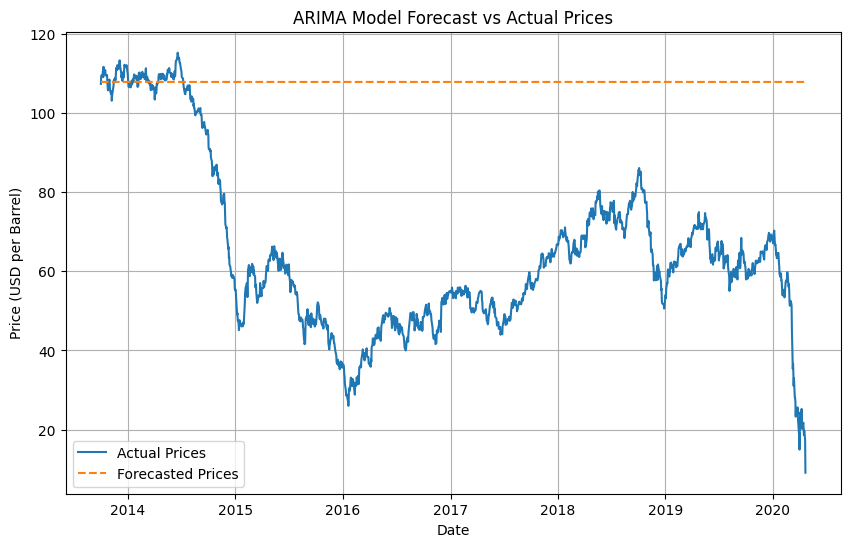

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train['Price'], order=(5, 1, 0))  # ARIMA(p,d,q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate model
mse = mean_squared_error(test['Price'], forecast)
print(f'Mean Squared Error: {mse}')

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual Prices')
plt.plot(test.index, forecast, label='Forecasted Prices', linestyle='--')
plt.title('ARIMA Model Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.grid(True)
plt.show()